# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [166]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

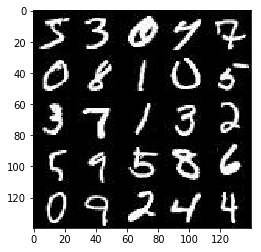

In [167]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

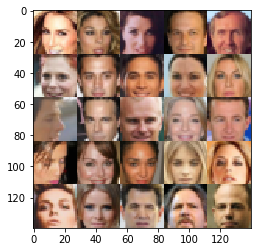

In [168]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [169]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [170]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    lr = tf.placeholder(tf.float32, name="learning_rate")

    return (input_real, input_z, lr)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [171]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        flat = tf.reshape(relu3, (-1, 4*4*256))
    
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits
    
        
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [172]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        alpha = 0.2
        
        x1 = tf.layers.dense(z, 7 * 7 * 256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)

        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        
        out = tf.tanh(logits)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [173]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [174]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(gen_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [175]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [176]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    if(data_image_mode == 'RGB'):
        image_channels = 3
    else:
        image_channels = 1
        
    image_width = data_shape[1]
    image_height = data_shape[2]
    
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)    
    d_loss,g_loss = model_loss(input_real, input_z, image_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    batch_num = 0
    samples, losses = [], []
    
    g_vars = [var for var in tf.trainable_variables() if var.name.startswith('generator')]
    saver = tf.train.Saver(var_list=g_vars)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # Sample random noise for G
                
                # Scale images between -1 and 1
                batch_images *= 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                batch_num += 1
                
                if (batch_num%100 == 0):
                    show_generator_output(sess=sess,
                                          image_mode=data_image_mode,
                                          input_z=input_z,
                                          n_images=10,
                                          out_channel_dim=image_channels)
            
                # At the end of each epoch, get the losses and print them out
                train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                train_loss_g = g_loss.eval({input_z: batch_z})

                print("Epoch {}/{}...".format(epoch_i+1, epochs),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g))    
                # Save losses to view after training
                losses.append((train_loss_d, train_loss_g))

            saver.save(sess, './checkpoints/generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.5836... Generator Loss: 0.3114
Epoch 1/2... Discriminator Loss: 0.7032... Generator Loss: 0.9047
Epoch 1/2... Discriminator Loss: 0.4030... Generator Loss: 1.5355
Epoch 1/2... Discriminator Loss: 0.3442... Generator Loss: 1.8576
Epoch 1/2... Discriminator Loss: 0.2737... Generator Loss: 1.9512
Epoch 1/2... Discriminator Loss: 0.4815... Generator Loss: 1.2844
Epoch 1/2... Discriminator Loss: 0.1818... Generator Loss: 3.4928
Epoch 1/2... Discriminator Loss: 0.1804... Generator Loss: 2.2930
Epoch 1/2... Discriminator Loss: 0.4357... Generator Loss: 1.3303
Epoch 1/2... Discriminator Loss: 0.1941... Generator Loss: 2.8608
Epoch 1/2... Discriminator Loss: 0.3965... Generator Loss: 1.4477
Epoch 1/2... Discriminator Loss: 0.2807... Generator Loss: 3.6991
Epoch 1/2... Discriminator Loss: 0.5161... Generator Loss: 1.1146
Epoch 1/2... Discriminator Loss: 0.1675... Generator Loss: 3.8633
Epoch 1/2... Discriminator Loss: 0.9156... Generator Loss: 0.7203
Epoch 1/2.

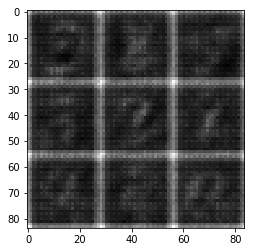

Epoch 1/2... Discriminator Loss: 0.8986... Generator Loss: 1.3382
Epoch 1/2... Discriminator Loss: 0.8561... Generator Loss: 1.0119
Epoch 1/2... Discriminator Loss: 0.9321... Generator Loss: 1.1580
Epoch 1/2... Discriminator Loss: 1.2553... Generator Loss: 0.5492
Epoch 1/2... Discriminator Loss: 1.1791... Generator Loss: 1.5550
Epoch 1/2... Discriminator Loss: 1.0378... Generator Loss: 0.7865
Epoch 1/2... Discriminator Loss: 0.9105... Generator Loss: 1.3269
Epoch 1/2... Discriminator Loss: 1.1495... Generator Loss: 0.7169
Epoch 1/2... Discriminator Loss: 1.0274... Generator Loss: 1.2827
Epoch 1/2... Discriminator Loss: 1.2642... Generator Loss: 0.5461
Epoch 1/2... Discriminator Loss: 1.1942... Generator Loss: 1.8792
Epoch 1/2... Discriminator Loss: 1.2149... Generator Loss: 0.6630
Epoch 1/2... Discriminator Loss: 1.1015... Generator Loss: 1.1841
Epoch 1/2... Discriminator Loss: 1.2232... Generator Loss: 0.7729
Epoch 1/2... Discriminator Loss: 1.2777... Generator Loss: 0.8929
Epoch 1/2.

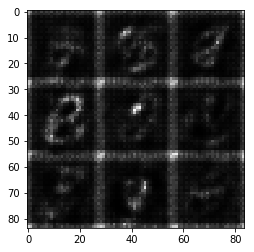

Epoch 1/2... Discriminator Loss: 0.7559... Generator Loss: 1.1772
Epoch 1/2... Discriminator Loss: 0.8985... Generator Loss: 0.8205
Epoch 1/2... Discriminator Loss: 0.8330... Generator Loss: 1.9202
Epoch 1/2... Discriminator Loss: 1.0037... Generator Loss: 0.6696
Epoch 1/2... Discriminator Loss: 0.8865... Generator Loss: 2.3535
Epoch 1/2... Discriminator Loss: 1.3583... Generator Loss: 0.3872
Epoch 1/2... Discriminator Loss: 1.1901... Generator Loss: 2.4621
Epoch 1/2... Discriminator Loss: 1.6563... Generator Loss: 0.2896
Epoch 1/2... Discriminator Loss: 1.1149... Generator Loss: 2.2258
Epoch 1/2... Discriminator Loss: 0.7962... Generator Loss: 0.9405
Epoch 1/2... Discriminator Loss: 0.7716... Generator Loss: 1.1825
Epoch 1/2... Discriminator Loss: 0.7718... Generator Loss: 1.6903
Epoch 1/2... Discriminator Loss: 0.9723... Generator Loss: 0.7190
Epoch 1/2... Discriminator Loss: 0.7246... Generator Loss: 1.6320
Epoch 1/2... Discriminator Loss: 0.7105... Generator Loss: 1.2174
Epoch 1/2.

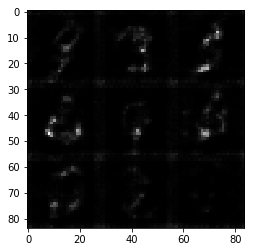

Epoch 1/2... Discriminator Loss: 0.5816... Generator Loss: 1.1663
Epoch 1/2... Discriminator Loss: 0.5461... Generator Loss: 1.6723
Epoch 1/2... Discriminator Loss: 0.5328... Generator Loss: 1.3589
Epoch 1/2... Discriminator Loss: 0.5917... Generator Loss: 1.3693
Epoch 1/2... Discriminator Loss: 0.6759... Generator Loss: 1.0923
Epoch 1/2... Discriminator Loss: 0.8698... Generator Loss: 2.7159
Epoch 1/2... Discriminator Loss: 0.6179... Generator Loss: 1.0720
Epoch 1/2... Discriminator Loss: 0.4109... Generator Loss: 1.9203
Epoch 1/2... Discriminator Loss: 0.7486... Generator Loss: 0.8790
Epoch 1/2... Discriminator Loss: 0.6290... Generator Loss: 2.0582
Epoch 1/2... Discriminator Loss: 0.6228... Generator Loss: 1.1152
Epoch 1/2... Discriminator Loss: 0.5923... Generator Loss: 1.3378
Epoch 1/2... Discriminator Loss: 0.5780... Generator Loss: 1.4282
Epoch 1/2... Discriminator Loss: 0.6960... Generator Loss: 1.2572
Epoch 1/2... Discriminator Loss: 0.6404... Generator Loss: 1.3293
Epoch 1/2.

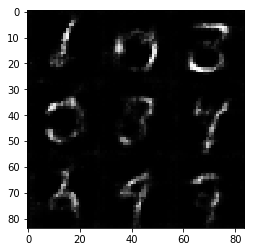

Epoch 1/2... Discriminator Loss: 0.8568... Generator Loss: 2.0714
Epoch 1/2... Discriminator Loss: 1.0625... Generator Loss: 0.6059
Epoch 1/2... Discriminator Loss: 0.8810... Generator Loss: 1.5495
Epoch 1/2... Discriminator Loss: 1.0731... Generator Loss: 0.6131
Epoch 1/2... Discriminator Loss: 0.7475... Generator Loss: 1.7739
Epoch 1/2... Discriminator Loss: 0.8086... Generator Loss: 0.9387
Epoch 1/2... Discriminator Loss: 0.6988... Generator Loss: 1.4165
Epoch 1/2... Discriminator Loss: 0.8107... Generator Loss: 0.9969
Epoch 1/2... Discriminator Loss: 0.7180... Generator Loss: 1.3641
Epoch 1/2... Discriminator Loss: 1.0859... Generator Loss: 0.5557
Epoch 1/2... Discriminator Loss: 1.0840... Generator Loss: 2.3181
Epoch 1/2... Discriminator Loss: 1.2076... Generator Loss: 0.5353
Epoch 1/2... Discriminator Loss: 0.7402... Generator Loss: 1.9396
Epoch 1/2... Discriminator Loss: 0.6937... Generator Loss: 1.1998
Epoch 1/2... Discriminator Loss: 0.8027... Generator Loss: 1.0197
Epoch 1/2.

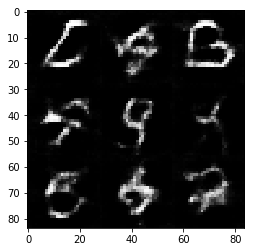

Epoch 2/2... Discriminator Loss: 1.0930... Generator Loss: 0.5858
Epoch 2/2... Discriminator Loss: 0.9978... Generator Loss: 1.5720
Epoch 2/2... Discriminator Loss: 0.7432... Generator Loss: 1.1601
Epoch 2/2... Discriminator Loss: 0.8342... Generator Loss: 0.8974
Epoch 2/2... Discriminator Loss: 0.7691... Generator Loss: 1.0202
Epoch 2/2... Discriminator Loss: 0.7332... Generator Loss: 1.7717
Epoch 2/2... Discriminator Loss: 0.9918... Generator Loss: 0.6848
Epoch 2/2... Discriminator Loss: 0.8296... Generator Loss: 1.6425
Epoch 2/2... Discriminator Loss: 1.0841... Generator Loss: 0.6001
Epoch 2/2... Discriminator Loss: 0.7876... Generator Loss: 2.3447
Epoch 2/2... Discriminator Loss: 0.6360... Generator Loss: 1.2184
Epoch 2/2... Discriminator Loss: 0.8093... Generator Loss: 0.8728
Epoch 2/2... Discriminator Loss: 0.8955... Generator Loss: 1.8026
Epoch 2/2... Discriminator Loss: 1.0330... Generator Loss: 0.6468
Epoch 2/2... Discriminator Loss: 0.7631... Generator Loss: 1.5174
Epoch 2/2.

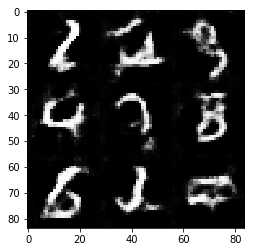

Epoch 2/2... Discriminator Loss: 0.7709... Generator Loss: 1.0244
Epoch 2/2... Discriminator Loss: 0.9043... Generator Loss: 0.8554
Epoch 2/2... Discriminator Loss: 0.9595... Generator Loss: 1.6250
Epoch 2/2... Discriminator Loss: 0.9643... Generator Loss: 0.7817
Epoch 2/2... Discriminator Loss: 0.8404... Generator Loss: 1.7259
Epoch 2/2... Discriminator Loss: 0.7117... Generator Loss: 1.1050
Epoch 2/2... Discriminator Loss: 0.7212... Generator Loss: 1.1294
Epoch 2/2... Discriminator Loss: 0.6803... Generator Loss: 1.7180
Epoch 2/2... Discriminator Loss: 1.0780... Generator Loss: 0.6070
Epoch 2/2... Discriminator Loss: 0.8866... Generator Loss: 1.8077
Epoch 2/2... Discriminator Loss: 0.9159... Generator Loss: 0.7235
Epoch 2/2... Discriminator Loss: 0.8008... Generator Loss: 1.3200
Epoch 2/2... Discriminator Loss: 0.9837... Generator Loss: 0.7487
Epoch 2/2... Discriminator Loss: 0.8370... Generator Loss: 1.4938
Epoch 2/2... Discriminator Loss: 1.1000... Generator Loss: 0.5837
Epoch 2/2.

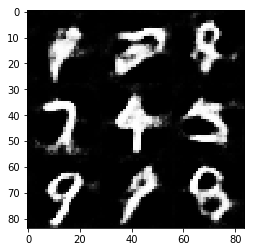

Epoch 2/2... Discriminator Loss: 0.8606... Generator Loss: 0.9782
Epoch 2/2... Discriminator Loss: 0.8980... Generator Loss: 1.0579
Epoch 2/2... Discriminator Loss: 0.8827... Generator Loss: 1.0298
Epoch 2/2... Discriminator Loss: 0.7285... Generator Loss: 1.2037
Epoch 2/2... Discriminator Loss: 0.8922... Generator Loss: 1.0328
Epoch 2/2... Discriminator Loss: 0.8285... Generator Loss: 1.5105
Epoch 2/2... Discriminator Loss: 0.9684... Generator Loss: 0.6923
Epoch 2/2... Discriminator Loss: 0.7602... Generator Loss: 1.7502
Epoch 2/2... Discriminator Loss: 0.7770... Generator Loss: 1.0201
Epoch 2/2... Discriminator Loss: 0.8363... Generator Loss: 1.2416
Epoch 2/2... Discriminator Loss: 0.8941... Generator Loss: 0.8115
Epoch 2/2... Discriminator Loss: 0.8563... Generator Loss: 1.3664
Epoch 2/2... Discriminator Loss: 0.8757... Generator Loss: 0.8795
Epoch 2/2... Discriminator Loss: 0.8236... Generator Loss: 1.2027
Epoch 2/2... Discriminator Loss: 0.8477... Generator Loss: 0.9352
Epoch 2/2.

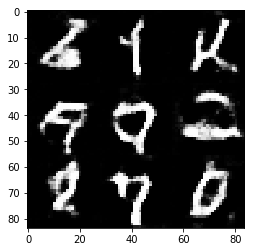

Epoch 2/2... Discriminator Loss: 0.7770... Generator Loss: 1.2552
Epoch 2/2... Discriminator Loss: 0.8157... Generator Loss: 0.8609
Epoch 2/2... Discriminator Loss: 0.7915... Generator Loss: 1.5844
Epoch 2/2... Discriminator Loss: 0.8194... Generator Loss: 0.9105
Epoch 2/2... Discriminator Loss: 0.7395... Generator Loss: 1.3464
Epoch 2/2... Discriminator Loss: 0.9254... Generator Loss: 0.7280
Epoch 2/2... Discriminator Loss: 0.8707... Generator Loss: 1.8199
Epoch 2/2... Discriminator Loss: 0.9335... Generator Loss: 0.7158
Epoch 2/2... Discriminator Loss: 0.9381... Generator Loss: 0.8962
Epoch 2/2... Discriminator Loss: 0.8512... Generator Loss: 1.7671
Epoch 2/2... Discriminator Loss: 0.7909... Generator Loss: 0.8357
Epoch 2/2... Discriminator Loss: 0.7287... Generator Loss: 1.3124
Epoch 2/2... Discriminator Loss: 0.7112... Generator Loss: 1.1170
Epoch 2/2... Discriminator Loss: 0.7677... Generator Loss: 1.1218
Epoch 2/2... Discriminator Loss: 0.7478... Generator Loss: 1.0958
Epoch 2/2.

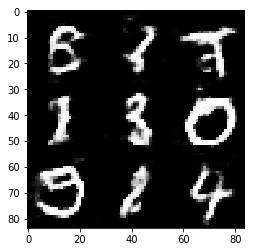

Epoch 2/2... Discriminator Loss: 1.5313... Generator Loss: 3.3122
Epoch 2/2... Discriminator Loss: 1.1505... Generator Loss: 0.5942
Epoch 2/2... Discriminator Loss: 0.3682... Generator Loss: 2.1993
Epoch 2/2... Discriminator Loss: 1.3341... Generator Loss: 0.4263
Epoch 2/2... Discriminator Loss: 0.7839... Generator Loss: 1.7151
Epoch 2/2... Discriminator Loss: 0.7800... Generator Loss: 1.1895
Epoch 2/2... Discriminator Loss: 0.7255... Generator Loss: 1.0415
Epoch 2/2... Discriminator Loss: 0.5822... Generator Loss: 1.4097
Epoch 2/2... Discriminator Loss: 0.5741... Generator Loss: 1.4906
Epoch 2/2... Discriminator Loss: 0.6830... Generator Loss: 1.1108
Epoch 2/2... Discriminator Loss: 1.1929... Generator Loss: 0.5307
Epoch 2/2... Discriminator Loss: 0.8513... Generator Loss: 1.3712
Epoch 2/2... Discriminator Loss: 0.6911... Generator Loss: 1.9189
Epoch 2/2... Discriminator Loss: 1.2358... Generator Loss: 0.4533
Epoch 2/2... Discriminator Loss: 0.8136... Generator Loss: 1.7501
Epoch 2/2.

In [177]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.4972... Generator Loss: 0.1138
Epoch 1/1... Discriminator Loss: 1.8398... Generator Loss: 0.2807
Epoch 1/1... Discriminator Loss: 1.0056... Generator Loss: 0.8641
Epoch 1/1... Discriminator Loss: 0.8229... Generator Loss: 1.1066
Epoch 1/1... Discriminator Loss: 0.7465... Generator Loss: 1.2006
Epoch 1/1... Discriminator Loss: 0.4593... Generator Loss: 1.5173
Epoch 1/1... Discriminator Loss: 0.4151... Generator Loss: 1.7470
Epoch 1/1... Discriminator Loss: 0.4587... Generator Loss: 1.7013
Epoch 1/1... Discriminator Loss: 0.5240... Generator Loss: 1.3984
Epoch 1/1... Discriminator Loss: 0.4953... Generator Loss: 1.5098
Epoch 1/1... Discriminator Loss: 0.3843... Generator Loss: 2.0449
Epoch 1/1... Discriminator Loss: 0.3429... Generator Loss: 1.7629
Epoch 1/1... Discriminator Loss: 0.3770... Generator Loss: 1.7325
Epoch 1/1... Discriminator Loss: 0.2969... Generator Loss: 2.1243
Epoch 1/1... Discriminator Loss: 0.3118... Generator Loss: 1.9480
Epoch 1/1.

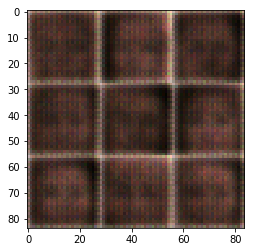

Epoch 1/1... Discriminator Loss: 0.8698... Generator Loss: 0.7616
Epoch 1/1... Discriminator Loss: 0.8857... Generator Loss: 4.5665
Epoch 1/1... Discriminator Loss: 0.9683... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 0.7005... Generator Loss: 4.2485
Epoch 1/1... Discriminator Loss: 0.8809... Generator Loss: 0.8165
Epoch 1/1... Discriminator Loss: 0.6541... Generator Loss: 2.4521
Epoch 1/1... Discriminator Loss: 0.7817... Generator Loss: 1.0469
Epoch 1/1... Discriminator Loss: 0.5152... Generator Loss: 1.9319
Epoch 1/1... Discriminator Loss: 0.6029... Generator Loss: 1.3005
Epoch 1/1... Discriminator Loss: 0.3565... Generator Loss: 2.5869
Epoch 1/1... Discriminator Loss: 0.7540... Generator Loss: 1.0405
Epoch 1/1... Discriminator Loss: 0.6254... Generator Loss: 3.2307
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 0.4217
Epoch 1/1... Discriminator Loss: 1.8056... Generator Loss: 5.1667
Epoch 1/1... Discriminator Loss: 0.8540... Generator Loss: 0.7616
Epoch 1/1.

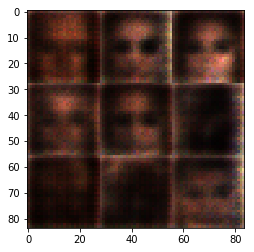

Epoch 1/1... Discriminator Loss: 0.4182... Generator Loss: 1.9628
Epoch 1/1... Discriminator Loss: 0.4292... Generator Loss: 1.6122
Epoch 1/1... Discriminator Loss: 0.4816... Generator Loss: 2.3408
Epoch 1/1... Discriminator Loss: 0.6691... Generator Loss: 1.0524
Epoch 1/1... Discriminator Loss: 0.4423... Generator Loss: 2.0661
Epoch 1/1... Discriminator Loss: 0.9262... Generator Loss: 0.7956
Epoch 1/1... Discriminator Loss: 0.7889... Generator Loss: 2.2712
Epoch 1/1... Discriminator Loss: 1.0457... Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 0.9416... Generator Loss: 2.7269
Epoch 1/1... Discriminator Loss: 0.6743... Generator Loss: 1.0236
Epoch 1/1... Discriminator Loss: 0.4191... Generator Loss: 2.1141
Epoch 1/1... Discriminator Loss: 0.1901... Generator Loss: 3.1427
Epoch 1/1... Discriminator Loss: 1.2379... Generator Loss: 0.4554
Epoch 1/1... Discriminator Loss: 0.9754... Generator Loss: 3.5872
Epoch 1/1... Discriminator Loss: 1.1856... Generator Loss: 0.6047
Epoch 1/1.

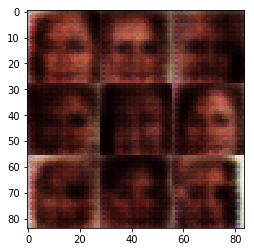

Epoch 1/1... Discriminator Loss: 1.4750... Generator Loss: 0.5359
Epoch 1/1... Discriminator Loss: 1.0715... Generator Loss: 3.3006
Epoch 1/1... Discriminator Loss: 0.5979... Generator Loss: 1.2793
Epoch 1/1... Discriminator Loss: 0.3090... Generator Loss: 2.1097
Epoch 1/1... Discriminator Loss: 0.4931... Generator Loss: 1.5673
Epoch 1/1... Discriminator Loss: 0.3098... Generator Loss: 3.0427
Epoch 1/1... Discriminator Loss: 0.6774... Generator Loss: 1.1090
Epoch 1/1... Discriminator Loss: 0.3876... Generator Loss: 2.6497
Epoch 1/1... Discriminator Loss: 0.5900... Generator Loss: 1.3778
Epoch 1/1... Discriminator Loss: 0.6129... Generator Loss: 1.3177
Epoch 1/1... Discriminator Loss: 0.4414... Generator Loss: 1.9786
Epoch 1/1... Discriminator Loss: 0.4331... Generator Loss: 1.9359
Epoch 1/1... Discriminator Loss: 0.5751... Generator Loss: 1.2004
Epoch 1/1... Discriminator Loss: 0.4795... Generator Loss: 2.0276
Epoch 1/1... Discriminator Loss: 0.9408... Generator Loss: 0.8115
Epoch 1/1.

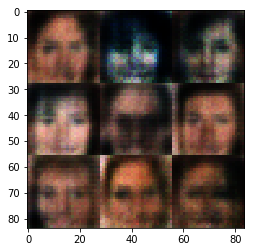

Epoch 1/1... Discriminator Loss: 0.5715... Generator Loss: 1.3184
Epoch 1/1... Discriminator Loss: 0.2377... Generator Loss: 4.1260
Epoch 1/1... Discriminator Loss: 2.0463... Generator Loss: 0.1933
Epoch 1/1... Discriminator Loss: 1.5670... Generator Loss: 4.0291
Epoch 1/1... Discriminator Loss: 0.3515... Generator Loss: 1.9496
Epoch 1/1... Discriminator Loss: 0.8347... Generator Loss: 0.8530
Epoch 1/1... Discriminator Loss: 0.2474... Generator Loss: 4.7032
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.4423
Epoch 1/1... Discriminator Loss: 1.1207... Generator Loss: 8.4220
Epoch 1/1... Discriminator Loss: 0.9549... Generator Loss: 0.7578
Epoch 1/1... Discriminator Loss: 0.3290... Generator Loss: 7.0152
Epoch 1/1... Discriminator Loss: 0.2535... Generator Loss: 2.4508
Epoch 1/1... Discriminator Loss: 0.1017... Generator Loss: 3.2913
Epoch 1/1... Discriminator Loss: 2.2454... Generator Loss: 0.1748
Epoch 1/1... Discriminator Loss: 1.2500... Generator Loss: 4.4202
Epoch 1/1.

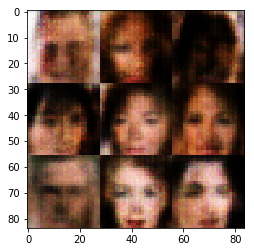

Epoch 1/1... Discriminator Loss: 0.2510... Generator Loss: 2.8863
Epoch 1/1... Discriminator Loss: 0.3512... Generator Loss: 1.6728
Epoch 1/1... Discriminator Loss: 0.3616... Generator Loss: 1.6856
Epoch 1/1... Discriminator Loss: 0.6214... Generator Loss: 1.1931
Epoch 1/1... Discriminator Loss: 0.5116... Generator Loss: 3.1682
Epoch 1/1... Discriminator Loss: 0.5652... Generator Loss: 1.2506
Epoch 1/1... Discriminator Loss: 0.3050... Generator Loss: 2.3783
Epoch 1/1... Discriminator Loss: 0.3483... Generator Loss: 1.7718
Epoch 1/1... Discriminator Loss: 0.2762... Generator Loss: 2.4544
Epoch 1/1... Discriminator Loss: 0.4418... Generator Loss: 1.4975
Epoch 1/1... Discriminator Loss: 0.2509... Generator Loss: 4.3397
Epoch 1/1... Discriminator Loss: 1.4464... Generator Loss: 0.3676
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 5.0857
Epoch 1/1... Discriminator Loss: 0.1737... Generator Loss: 3.0667
Epoch 1/1... Discriminator Loss: 1.6911... Generator Loss: 0.2624
Epoch 1/1.

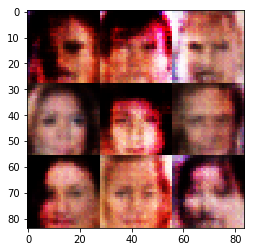

Epoch 1/1... Discriminator Loss: 0.1526... Generator Loss: 3.7010
Epoch 1/1... Discriminator Loss: 0.1124... Generator Loss: 3.0101
Epoch 1/1... Discriminator Loss: 1.4638... Generator Loss: 0.3333
Epoch 1/1... Discriminator Loss: 0.7058... Generator Loss: 4.7404
Epoch 1/1... Discriminator Loss: 0.2180... Generator Loss: 2.9815
Epoch 1/1... Discriminator Loss: 0.1567... Generator Loss: 2.6362
Epoch 1/1... Discriminator Loss: 0.6436... Generator Loss: 0.9096
Epoch 1/1... Discriminator Loss: 0.3408... Generator Loss: 5.2109
Epoch 1/1... Discriminator Loss: 0.4225... Generator Loss: 1.9122
Epoch 1/1... Discriminator Loss: 0.2443... Generator Loss: 3.1244
Epoch 1/1... Discriminator Loss: 0.2582... Generator Loss: 1.9882
Epoch 1/1... Discriminator Loss: 0.1245... Generator Loss: 4.1198
Epoch 1/1... Discriminator Loss: 0.9656... Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 0.4537... Generator Loss: 7.0887
Epoch 1/1... Discriminator Loss: 0.3073... Generator Loss: 2.2051
Epoch 1/1.

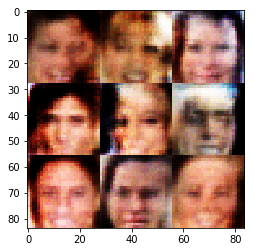

Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 0.5947
Epoch 1/1... Discriminator Loss: 0.5557... Generator Loss: 4.4053
Epoch 1/1... Discriminator Loss: 0.4506... Generator Loss: 1.9668
Epoch 1/1... Discriminator Loss: 0.3648... Generator Loss: 1.7232
Epoch 1/1... Discriminator Loss: 0.2644... Generator Loss: 2.5057
Epoch 1/1... Discriminator Loss: 0.3363... Generator Loss: 1.9436
Epoch 1/1... Discriminator Loss: 0.2370... Generator Loss: 3.2940
Epoch 1/1... Discriminator Loss: 0.2686... Generator Loss: 2.3020
Epoch 1/1... Discriminator Loss: 0.3336... Generator Loss: 1.9725
Epoch 1/1... Discriminator Loss: 0.2323... Generator Loss: 3.4601
Epoch 1/1... Discriminator Loss: 1.0869... Generator Loss: 0.5458
Epoch 1/1... Discriminator Loss: 0.9532... Generator Loss: 5.3959
Epoch 1/1... Discriminator Loss: 0.7774... Generator Loss: 0.9141
Epoch 1/1... Discriminator Loss: 0.3827... Generator Loss: 2.6777
Epoch 1/1... Discriminator Loss: 0.4144... Generator Loss: 1.6123
Epoch 1/1.

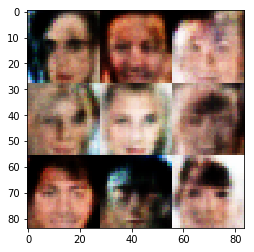

Epoch 1/1... Discriminator Loss: 0.5822... Generator Loss: 5.2464
Epoch 1/1... Discriminator Loss: 0.4693... Generator Loss: 1.4663
Epoch 1/1... Discriminator Loss: 0.8012... Generator Loss: 0.8632
Epoch 1/1... Discriminator Loss: 0.4149... Generator Loss: 4.3531
Epoch 1/1... Discriminator Loss: 0.5914... Generator Loss: 1.1873
Epoch 1/1... Discriminator Loss: 0.3656... Generator Loss: 4.2826
Epoch 1/1... Discriminator Loss: 0.2309... Generator Loss: 2.1613
Epoch 1/1... Discriminator Loss: 0.0915... Generator Loss: 3.9951
Epoch 1/1... Discriminator Loss: 0.8804... Generator Loss: 0.6570
Epoch 1/1... Discriminator Loss: 1.0071... Generator Loss: 5.0984
Epoch 1/1... Discriminator Loss: 0.6202... Generator Loss: 1.1005
Epoch 1/1... Discriminator Loss: 0.5978... Generator Loss: 1.4621
Epoch 1/1... Discriminator Loss: 0.3464... Generator Loss: 2.9258
Epoch 1/1... Discriminator Loss: 0.2808... Generator Loss: 2.1981
Epoch 1/1... Discriminator Loss: 0.1565... Generator Loss: 3.7796
Epoch 1/1.

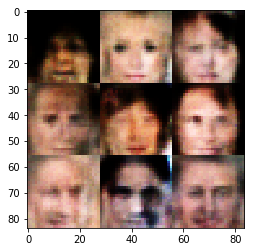

Epoch 1/1... Discriminator Loss: 0.2185... Generator Loss: 3.0577
Epoch 1/1... Discriminator Loss: 0.1979... Generator Loss: 2.4471
Epoch 1/1... Discriminator Loss: 0.2572... Generator Loss: 2.0760
Epoch 1/1... Discriminator Loss: 0.2506... Generator Loss: 3.3912
Epoch 1/1... Discriminator Loss: 0.2849... Generator Loss: 2.3342
Epoch 1/1... Discriminator Loss: 0.2297... Generator Loss: 2.9290
Epoch 1/1... Discriminator Loss: 0.3324... Generator Loss: 1.9279
Epoch 1/1... Discriminator Loss: 0.3424... Generator Loss: 3.5224
Epoch 1/1... Discriminator Loss: 0.1745... Generator Loss: 3.7759
Epoch 1/1... Discriminator Loss: 0.5387... Generator Loss: 1.1216
Epoch 1/1... Discriminator Loss: 0.4694... Generator Loss: 3.3532
Epoch 1/1... Discriminator Loss: 0.2425... Generator Loss: 3.2292
Epoch 1/1... Discriminator Loss: 0.3204... Generator Loss: 1.7236
Epoch 1/1... Discriminator Loss: 0.2695... Generator Loss: 2.1839
Epoch 1/1... Discriminator Loss: 0.2973... Generator Loss: 4.4822
Epoch 1/1.

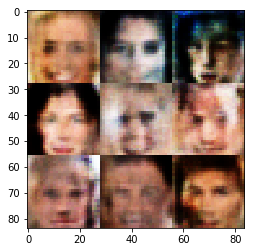

Epoch 1/1... Discriminator Loss: 0.2635... Generator Loss: 2.4476
Epoch 1/1... Discriminator Loss: 0.1940... Generator Loss: 5.5121
Epoch 1/1... Discriminator Loss: 0.7934... Generator Loss: 0.7826
Epoch 1/1... Discriminator Loss: 0.4099... Generator Loss: 6.6483
Epoch 1/1... Discriminator Loss: 0.4720... Generator Loss: 1.3184
Epoch 1/1... Discriminator Loss: 0.2812... Generator Loss: 3.9209
Epoch 1/1... Discriminator Loss: 0.2988... Generator Loss: 1.8888
Epoch 1/1... Discriminator Loss: 0.1387... Generator Loss: 4.7502
Epoch 1/1... Discriminator Loss: 0.3683... Generator Loss: 1.5544
Epoch 1/1... Discriminator Loss: 0.1480... Generator Loss: 5.3044
Epoch 1/1... Discriminator Loss: 0.5653... Generator Loss: 1.1844
Epoch 1/1... Discriminator Loss: 0.6264... Generator Loss: 5.7225
Epoch 1/1... Discriminator Loss: 1.8340... Generator Loss: 0.2161
Epoch 1/1... Discriminator Loss: 1.4765... Generator Loss: 3.0668
Epoch 1/1... Discriminator Loss: 0.4211... Generator Loss: 1.3042
Epoch 1/1.

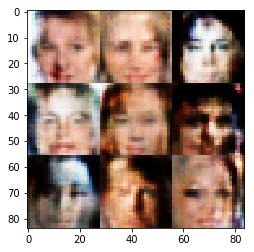

Epoch 1/1... Discriminator Loss: 1.7794... Generator Loss: 4.6026
Epoch 1/1... Discriminator Loss: 1.0082... Generator Loss: 0.6072
Epoch 1/1... Discriminator Loss: 1.0344... Generator Loss: 1.6815
Epoch 1/1... Discriminator Loss: 1.5579... Generator Loss: 0.3372
Epoch 1/1... Discriminator Loss: 1.5963... Generator Loss: 4.6117
Epoch 1/1... Discriminator Loss: 2.3225... Generator Loss: 0.1727
Epoch 1/1... Discriminator Loss: 1.5262... Generator Loss: 1.5425
Epoch 1/1... Discriminator Loss: 1.7733... Generator Loss: 0.2650
Epoch 1/1... Discriminator Loss: 2.0185... Generator Loss: 3.8829
Epoch 1/1... Discriminator Loss: 1.5432... Generator Loss: 0.3511
Epoch 1/1... Discriminator Loss: 1.2468... Generator Loss: 1.4235
Epoch 1/1... Discriminator Loss: 0.2612... Generator Loss: 1.9971
Epoch 1/1... Discriminator Loss: 0.5639... Generator Loss: 1.1112
Epoch 1/1... Discriminator Loss: 0.6626... Generator Loss: 2.0704
Epoch 1/1... Discriminator Loss: 0.2644... Generator Loss: 4.7969
Epoch 1/1.

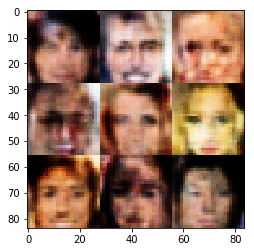

Epoch 1/1... Discriminator Loss: 0.3257... Generator Loss: 1.7816
Epoch 1/1... Discriminator Loss: 0.2394... Generator Loss: 3.3329
Epoch 1/1... Discriminator Loss: 0.6259... Generator Loss: 1.0151
Epoch 1/1... Discriminator Loss: 0.3301... Generator Loss: 5.9039
Epoch 1/1... Discriminator Loss: 0.4496... Generator Loss: 1.3467
Epoch 1/1... Discriminator Loss: 0.4707... Generator Loss: 2.8728
Epoch 1/1... Discriminator Loss: 0.4031... Generator Loss: 1.5210
Epoch 1/1... Discriminator Loss: 0.1175... Generator Loss: 3.7982
Epoch 1/1... Discriminator Loss: 0.1567... Generator Loss: 3.0935
Epoch 1/1... Discriminator Loss: 0.4005... Generator Loss: 1.6461
Epoch 1/1... Discriminator Loss: 0.2924... Generator Loss: 6.2959
Epoch 1/1... Discriminator Loss: 0.8002... Generator Loss: 0.7900
Epoch 1/1... Discriminator Loss: 0.1868... Generator Loss: 4.7683
Epoch 1/1... Discriminator Loss: 0.4132... Generator Loss: 1.5937
Epoch 1/1... Discriminator Loss: 0.1449... Generator Loss: 3.6940
Epoch 1/1.

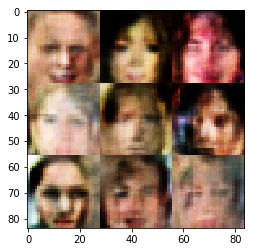

Epoch 1/1... Discriminator Loss: 0.3035... Generator Loss: 1.7937
Epoch 1/1... Discriminator Loss: 0.2064... Generator Loss: 3.0659
Epoch 1/1... Discriminator Loss: 0.1488... Generator Loss: 3.2974
Epoch 1/1... Discriminator Loss: 0.5021... Generator Loss: 1.2549
Epoch 1/1... Discriminator Loss: 0.2913... Generator Loss: 4.9748
Epoch 1/1... Discriminator Loss: 0.6167... Generator Loss: 1.0812
Epoch 1/1... Discriminator Loss: 0.3637... Generator Loss: 3.9967
Epoch 1/1... Discriminator Loss: 0.2164... Generator Loss: 2.4747
Epoch 1/1... Discriminator Loss: 0.0852... Generator Loss: 4.4564
Epoch 1/1... Discriminator Loss: 0.6864... Generator Loss: 0.9182
Epoch 1/1... Discriminator Loss: 0.2436... Generator Loss: 5.2942
Epoch 1/1... Discriminator Loss: 0.2866... Generator Loss: 1.7609
Epoch 1/1... Discriminator Loss: 0.3228... Generator Loss: 5.3293
Epoch 1/1... Discriminator Loss: 0.1114... Generator Loss: 3.6686
Epoch 1/1... Discriminator Loss: 0.7297... Generator Loss: 0.8610
Epoch 1/1.

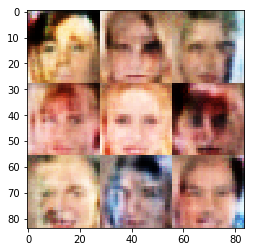

Epoch 1/1... Discriminator Loss: 0.4121... Generator Loss: 1.7707
Epoch 1/1... Discriminator Loss: 0.2328... Generator Loss: 2.7216
Epoch 1/1... Discriminator Loss: 0.1305... Generator Loss: 3.0939
Epoch 1/1... Discriminator Loss: 0.2617... Generator Loss: 2.1245
Epoch 1/1... Discriminator Loss: 0.1280... Generator Loss: 5.5369
Epoch 1/1... Discriminator Loss: 1.1424... Generator Loss: 0.4862
Epoch 1/1... Discriminator Loss: 0.9067... Generator Loss: 5.9855
Epoch 1/1... Discriminator Loss: 0.5786... Generator Loss: 1.0996
Epoch 1/1... Discriminator Loss: 1.0262... Generator Loss: 0.6565
Epoch 1/1... Discriminator Loss: 0.9293... Generator Loss: 4.0107
Epoch 1/1... Discriminator Loss: 1.1123... Generator Loss: 0.6114
Epoch 1/1... Discriminator Loss: 2.7996... Generator Loss: 2.6415
Epoch 1/1... Discriminator Loss: 2.8038... Generator Loss: 0.1289
Epoch 1/1... Discriminator Loss: 4.0727... Generator Loss: 6.5511
Epoch 1/1... Discriminator Loss: 3.0903... Generator Loss: 0.0954
Epoch 1/1.

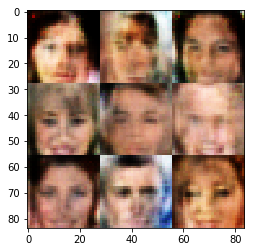

Epoch 1/1... Discriminator Loss: 0.1155... Generator Loss: 4.5803
Epoch 1/1... Discriminator Loss: 0.2372... Generator Loss: 1.9865
Epoch 1/1... Discriminator Loss: 0.4999... Generator Loss: 1.2376
Epoch 1/1... Discriminator Loss: 0.3781... Generator Loss: 3.8461
Epoch 1/1... Discriminator Loss: 0.2383... Generator Loss: 2.1455
Epoch 1/1... Discriminator Loss: 0.3185... Generator Loss: 1.9047
Epoch 1/1... Discriminator Loss: 0.3107... Generator Loss: 1.7937
Epoch 1/1... Discriminator Loss: 0.2209... Generator Loss: 4.4322
Epoch 1/1... Discriminator Loss: 0.3345... Generator Loss: 1.7804
Epoch 1/1... Discriminator Loss: 0.1181... Generator Loss: 3.3034
Epoch 1/1... Discriminator Loss: 0.4307... Generator Loss: 1.3630
Epoch 1/1... Discriminator Loss: 0.2890... Generator Loss: 4.2725
Epoch 1/1... Discriminator Loss: 0.1623... Generator Loss: 2.9200
Epoch 1/1... Discriminator Loss: 0.7461... Generator Loss: 0.8484
Epoch 1/1... Discriminator Loss: 0.4701... Generator Loss: 2.8561
Epoch 1/1.

In [178]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.